<h2> Nauczanie maszynowe/Ćwiczenia1

Uczenie maszynowe można podzielić na:

- Uczenie **nadzorowane** (z nauczycielem) - na podstawie danych $(x_i, y_i)$ uczymy się funkcji $f_{\theta}$, takiej że $y_i \approx f_{\theta}(x_i)$
- Uczenie **nienadzorowane** (bez nauczyciela) - na podstawie danych $(x_i)$ uczymy się $p(x;\theta) = \sum_z p(x|z;\theta)p(z;\theta)$
- Uczenie **ze wzmocnieniem** - uczymy się polityki $\pi(a|x)$


Będziemy zajmować się przede wszystkim  uczeniem nadzorowanym oraz nienadzorowanym. Aby wyznaczyć parametr $\theta$ rozważmy różnego typu **funkcje kosztu**. Funkcja kosztu mierzy średnią różnicę pomiędzy przewidywaniem a rzeczywistą wartością.

Przykłady:

* MeanError = $\frac{1}{N} \sum_{i=1}^N \|X_i - v_i\|$
* MeanSquaredError = $\frac{1}{N} \sum_{i=1}^N  \|X_i - v_i\|^2$
* MaxError = $\max_i \|X_i - v_i\|$

gdzie $X$ reprezentuje dane, a $v$ jest wektorem szukanych wartości. Zazwyczaj zakładamy szczególną postać $v$ (model).

**Ćwiczenie**: Załóżmy, że dane są wartości 1, 4, 5, 10, 15 oraz że szukamy jednej wartości $v_i$ (dla wszystkich liczb) minimalizującej powyższe funkcje.

https://www.desmos.com/calculator?lang=pl

- W uczeniu nadzorowanym najczęsciej interesuje nas zagadnienie **regresji** lub **klasyfikacji**.

- Modele **dyskryminatywne** a **generatywne**

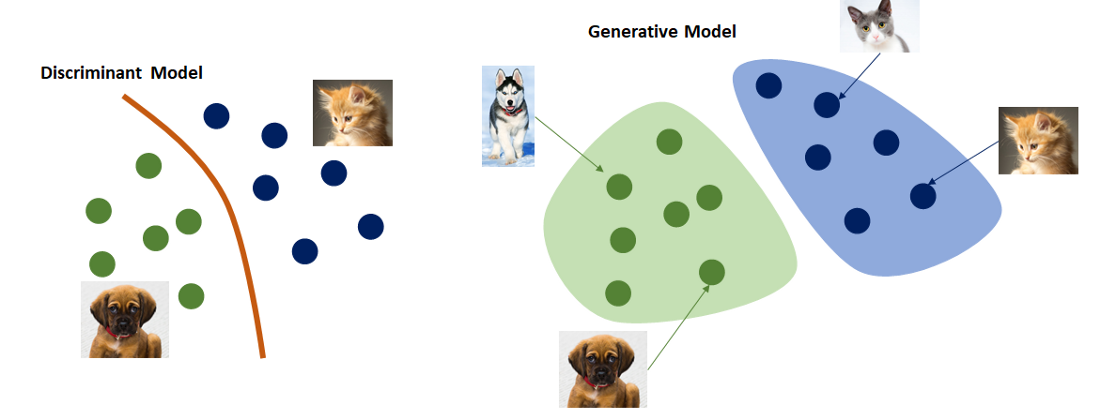

In [42]:
from IPython import display
display.Image("disc_gen.png", width="800", height="500")

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [45]:
print("""
**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
""")


**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is th

In [46]:
d2 = df[["indus","rm"]] #wyciągamy tylko 2 cechy: INDUS, RM
target = df['medv']

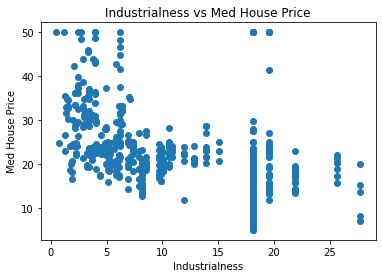

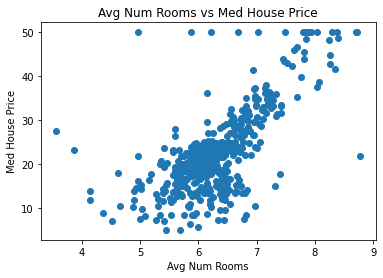

In [47]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2.iloc[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2.iloc[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

Zastosujemy metrykę $MSE$.

<center>
$MSE(y,t) = \frac{1}{N}\sum_{i}(t^{i} - y^{i}_{pred})^2$
    
 

W przypadku regresji liniowej 2 zmiennych:
    
<center>
$MSE(y,t) = \frac{1}{N}\sum_{i}(t^{i}-(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0))^2$

In [48]:
def loss_function(w1, w2, w0, X, t):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane w postaci listy list (X) oraz wartosci (t),
    a ktora zwraca wartosc funkcji kosztu.
    """
    pass

In [58]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)

4177.838550094863

In [59]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

41.23433170553358

<h4> Zadanie1: Uzupełnij definicję powyższej funkcji.

Często na początku nie mamy informacji o tym jakie powinny być parametry modelu; możemy zacząć od losowych wartości. Pojawia się więc pytanie jak je aktualizować aby wartości funkcji kosztu były coraz mniejsze? Jedno z najpopularnieszych podejść (i stanowiące podstawę do innych algorytmów) jest opartę o metodę spadku gradientu (Gradient Descent). Liczymy pochodną funkcji kosztu po rozważanych parametrach a następnie aktualizujemu je wg:

<center> 
$w_{new} = w_{old} - \eta \cdot \frac{d MSE}{dw}$
</center>

Ale:
    
* nie mamy gwarancji, że dojdziemy do minimum globalnego
* zły wybór długości kroku spowoduje katastrofalne rezultaty
* dla funkcji nieróżniczkowalnych w punktach (takich jak mean error czy maximum error) sytuacja staje się skomplikowana
* wiele, wiele innych.

<h4> Ćwiczenie: Znajdź najmniejszą wartość funkcji $f(x) =x^2-6x+1$ metodą spadku gradientu.

In [10]:
def update_weights(w1, w2, w0, X, t, eta):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane (X), wartosci (t) oraz wspolczynnik uczenia
    (eta), a ktora zwraca zaktualizowane wartosci w1, w2, w0
    """
    pass

In [63]:
#przykladowe wywolanie
update_weights(3, 8, -1, d2, target, 0.001)

(1.3475409820553372, 7.25629196515415, -1.120309209486166)

<h4> Zadanie2: Uzupełnij definicję powyższej funkcji.

<h4> Zadanie3: Celem jest zbudowanie modelu regresji liniowej przewidującego $target$ w oparciu o $d2$. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując $\eta=0.001$ wykonaj 1000 aktualizacji tych parametrów na podstawie metody gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla $\eta=0.01$ oraz $\eta=0.00001$. Skomentuj otrzymane wyniki.

<h4> Zadanie4: Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie?

Oczywiście w Pythonie istnieje implementacja metody regresji liniowej

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()
model.fit(d2, target);

In [68]:
model.coef_ #wspolczynnki dla zmiennych

array([-0.33471389,  7.82205511])

In [69]:
model.intercept_ #wyraz wolny

-22.898315729225057

<h4> Zadanie5: Porównaj te parametry z otrzymanymi z Zadania3. Z czego może wynikać ta różnica?

In [70]:
r_sq = model.score(d2, target) #R2 modelu
print(r_sq) 

0.5362984005856312


In [71]:
y_pred = model.predict(d2) #przewidywane y
print(y_pred[:5])

[27.75850755 24.96067296 30.93672306 31.11074967 32.27623588]


<h3> Co jeżeli dane nie są liniowe?

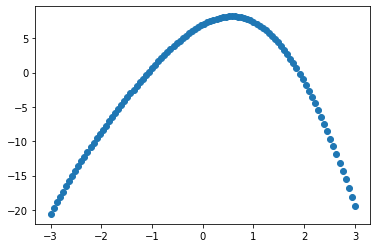

In [73]:
def non_linear(x):
    return -3*x**2+4*np.sin(x)+7

x = np.linspace(-3,3,100) #100 liczb z przedzialu [-3,3]
y = non_linear(x)

plt.scatter(x,y)
plt.show()

Załóżmy, że dane są tylko $x$ oraz $y$ oraz znana jest zależność między nimi, tzn $y=ax^2+b \sin x +c$, przy czym $a,b,c$ są nieznane.

In [74]:
x1 = x**2
x2 = np.sin(x)
X = np.vstack((x1, x2)).T #lącze je w tablice 2D
target = y

In [75]:
w1 = 1
w2 = 1
w0 = 1

l = []

for i in range(10000):
    l.append(loss_function(w1, w2, w0, X, target))
    w1, w2, w0 = update_weights(w1, w2, w0, X, target, 0.001)

In [76]:
w1, w2, w0

(-2.9997764991237617, 3.999905906016437, 6.998800266145433)

Wniosek: Powyższa metoda może być stosowana także do nieliniowych funkcji.

<h3> Parametry modelu a hiperparametry

- parametry modelu ($w_1, w_2, w_0$)
- hiperparametry (np. $\eta$), są zewnętrzne wobec modelu

Dane zazwyczaj dzielimy na 2 lub 3 grupy - zbiór **treningowy**, zbiór **walidacyjny** oraz zbiór **testowy**.

Ogólnie:
- Na zbiorze treningowym uczymy parametrów modelu za pomocą metody spadku gradientu.
- Z użyciem zbioru walidacyjnego wybieramy najbardziej optymalne hiperparametry.
- Sprawdzamy wybrany zbiór parametrów i hiperparametrów na zbiorze testowym

<h4> Zadanie6: Rozważ jeszcze raz dane $d2/target$. 
    
- Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej zdefiniuj odpowiednią funkcję. 
- Przetestuj różne wartości parametrów $\eta$ na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym. 
- Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

<h3> Uzupełnienie

In [27]:
#podstawowe statystyki
x = np.array([11,12,13,14,15,16,17,18,19,20])
print(np.mean(x), np.median(x), np.std(x), np.var(x), np.percentile(x, 90))

15.5 15.5 2.8722813232690143 8.25 19.1


In [28]:
#liczby losowe

print(np.random.uniform(0, 5, 10))
print()
print(np.random.normal(0, 5, 10))

[2.77926919 0.19755123 3.28876392 2.3597231  1.33932004 2.26689586
 3.76502066 4.53868377 0.1311207  4.1017045 ]

[ 3.21672822  5.06219779 -6.46172483 -1.68390651  3.02334778 -2.73453689
 -1.47148044 -0.95295645 -4.75853528 -0.10640448]


In [29]:
#pandas i standaryzacja (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [30]:
#porownaj z wynikiem wyzej
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [31]:
#podzial tekstu na zbior testowy i treningowy
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
